In [19]:
#We will make a basic CNN model to classify CIFAR-10#
#We will use Keras from Tensorflow to build the model#

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.metrics import SparseTopKCategoricalAccuracy
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
import numpy as np
import matplotlib.pyplot as plt
import datetime


#show the tensorflow version
print(tf.__version__)


2.10.1


In [3]:
#Test if have GPU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4448348391550748628
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5663940608
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14154368798708604469
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
#load the CIFAR-100 dataset & split into train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Normalize pixel values from 1-255 to 0-1
x_train, x_test = x_train / 255.0, x_test / 255.0

#show the shape of the dataset
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape) 

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:
#shuffle train & test data

# # Assuming x_train and y_train are your data
# indices = np.arange(x_train.shape[0])
# np.random.shuffle(indices)

# # Let's say we want to select 10000 random samples
# x_train_subset = x_train[indices[:10000]]
# y_train_subset = y_train[indices[:10000]]

## Model

In [17]:
#Build model

model = Sequential()

# Block 1
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 4
model.add(Flatten())
model.add(Dense(256, activation='relu'))

# Block 5
model.add(Dense(10, activation='softmax'))

# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 128)        

In [20]:
#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy', SparseTopKCategoricalAccuracy(k=3)])

#Train the model
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), callbacks=[tensorboard_callback])
#save loss & validation loss every 
train_loss = history.history['loss']
val_loss = history.history['val_loss']
#top 3 validation accuracy
val_top_3_acc = history.history['val_sparse_top_k_categorical_accuracy']

Epoch 1/20
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5587 - accuracy: 0.4188 - sparse_top_k_categorical_accuracy: 0.7439 - val_loss: 1.1842 - val_accuracy: 0.5633 - val_sparse_top_k_categorical_accuracy: 0.8700
Epoch 2/20
1563/1563 [==============================] - 13s 9ms/step - loss: 1.0115 - accuracy: 0.6387 - sparse_top_k_categorical_accuracy: 0.8962 - val_loss: 0.8982 - val_accuracy: 0.6816 - val_sparse_top_k_categorical_accuracy: 0.9136
Epoch 3/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.8101 - accuracy: 0.7141 - sparse_top_k_categorical_accuracy: 0.9287 - val_loss: 0.8415 - val_accuracy: 0.7062 - val_sparse_top_k_categorical_accuracy: 0.9234
Epoch 4/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6889 - accuracy: 0.7574 - sparse_top_k_categorical_accuracy: 0.9452 - val_loss: 0.7833 - val_accuracy: 0.7273 - val_sparse_top_k_categorical_accuracy: 0.9288
Epoch 5/20
1563/1563 [==============================

KeyError: 'val_top_k_categorical_accuracy'

## Store loss & accuracy

In [22]:
#store training loss and validation loss as a numpy array
np.save('train_loss.npy', train_loss)
np.save('val_loss.npy', val_loss)
#store accuracy and validation accuracy as a numpy array
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
np.save('train_accuracy.npy', train_accuracy)
np.save('val_accuracy.npy', val_accuracy)

np.save('val_top_3_acc.npy', val_top_3_acc)

## load loss & accuracy

In [23]:
#load the loss and accuracy data
train_loss = np.load('train_loss.npy')
val_loss = np.load('val_loss.npy')
train_accuracy = np.load('train_accuracy.npy')
val_accuracy = np.load('val_accuracy.npy')
val_top_3_acc = np.load('val_top_3_acc.npy')

## Plot

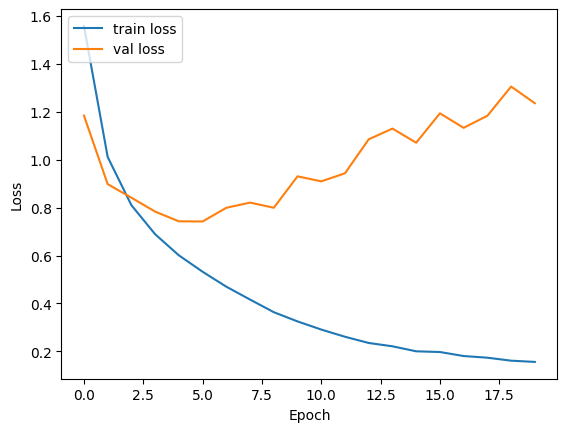

In [24]:
#plot loss
plt.plot(train_loss, label='train loss')
plt.plot(val_loss, label = 'val loss')  

plt.xlabel('Epoch')
plt.ylabel('Loss')
#legend
plt.legend(loc='upper left')
#show plot
plt.show()


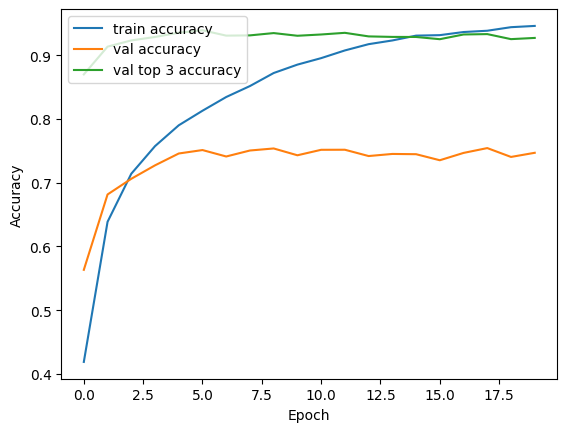

In [25]:
#plot accuracy
plt.plot(train_accuracy, label='train accuracy')
plt.plot(val_accuracy, label = 'val accuracy')
plt.plot(val_top_3_acc, label = 'val top 3 accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#legend
plt.legend(loc='upper left')
#show plot
plt.show()


In [26]:
#print max of top accuracies
print("Top Validation Accuracy")
print(max(val_accuracy))
print("Top 3 Validation Accuracy")
print(max(val_top_3_acc))

Top Validation Accuracy
0.7544000148773193
Top 3 Validation Accuracy
0.939300000667572


313/313 [==============================] - 1s 4ms/step


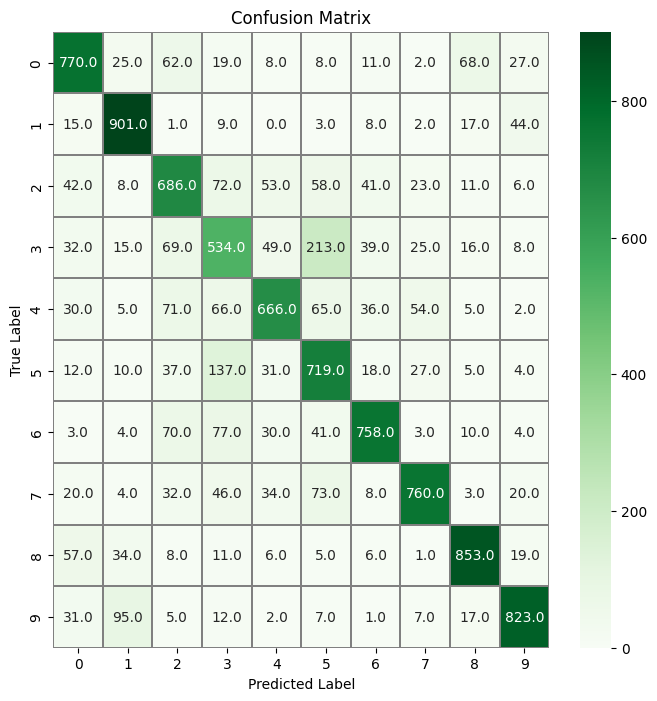

In [27]:
## CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.squeeze(y_test)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()





## Save the trained Model

In [28]:
#save the trained model (Parameters) so I can use it again without training again
model.save('cifar10_cnn.h5')
#save the trained model (Weights) so I can use it again without training again
model.save_weights('cifar10_cnn_weights.h5')


## Load the trained Model

In [29]:
#load the trained model (Parameters) so I can use it again without training again
#model = keras.models.load_model('cifar100_cnn.h5')

#load the trained model (Weights) so I can use it again without training again
#model.load_weights('cifar100_cnn_weights.h5')